# Projeto Guiado III
Nesse projeto irei utilizar o mesmo banco de dados do exercício da semana anterior, no entanto, tentando executar o que deu erro e tentando trazer outras análises que não foram feitas.
O banco de dados mostra uma lista de musicas mais ouvidas no spotify no ano de 2023. Observei que são as mais ouvidas nos EUA.
O arquivo csv exibe variados dados, como nome da música, do artista, numero de artistas envolvidos, ano/mês/dia de lançamento, posição nos charts do spotify, apple music e shazam, batidas por minuto e porcentagens relacionadas a dançabilidade, energia, etc.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("spotify.csv", sep="," , encoding= 'latin-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


# Informações iniciais e tradução das colunas

In [13]:
# Mostrar o tipo do dataframe
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [14]:
# Mostrar informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   nome da musica        953 non-null    object
 1   artista               953 non-null    object
 2   artistas envolvidos   953 non-null    int64 
 3   ano de lancamento     953 non-null    int64 
 4   mes de lancamento     953 non-null    int64 
 5   dia de lancamento     953 non-null    int64 
 6   playlists no spotify  953 non-null    int64 
 7   popularidade          953 non-null    int64 
 8   streams               953 non-null    object
 9   playlists na apple    953 non-null    int64 
 10  posicao na apple      953 non-null    int64 
 11  playlists no deezer   953 non-null    object
 12  posicao no deezer     953 non-null    int64 
 13  posicao no shazam     903 non-null    object
 14  batidas por minuto    953 non-null    int64 
 15  tom                   858 non-null    ob

In [15]:
# Mostrar memória utilizada no df
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   nome da musica        953 non-null    object
 1   artista               953 non-null    object
 2   artistas envolvidos   953 non-null    int64 
 3   ano de lancamento     953 non-null    int64 
 4   mes de lancamento     953 non-null    int64 
 5   dia de lancamento     953 non-null    int64 
 6   playlists no spotify  953 non-null    int64 
 7   popularidade          953 non-null    int64 
 8   streams               953 non-null    object
 9   playlists na apple    953 non-null    int64 
 10  posicao na apple      953 non-null    int64 
 11  playlists no deezer   953 non-null    object
 12  posicao no deezer     953 non-null    int64 
 13  posicao no shazam     903 non-null    object
 14  batidas por minuto    953 non-null    int64 
 15  tom                   858 non-null    ob

In [3]:
# Função para traduzir colunas para português
traducoes = {
    'track_name': 'nome da musica',
    'artist(s)_name': 'artista',
    'artist_count': 'artistas envolvidos',
    'released_year': 'ano de lancamento',
    'released_month': 'mes de lancamento',
    'released_day': 'dia de lancamento',
    'in_spotify_playlists': 'playlists no spotify',
    'in_spotify_charts': 'popularidade',
    'streams': 'streams',
    'in_apple_playlists': 'playlists na apple',
    'in_apple_charts': 'posicao na apple',
    'in_deezer_playlists': 'playlists no deezer',
    'in_deezer_charts': 'posicao no deezer',
    'in_shazam_charts': 'posicao no shazam',
    'bpm': 'batidas por minuto',
    'key': 'tom',
    'mode': 'escala',
    'danceability_%': 'dancavel',
    'valence_%': 'positividade',
    'energy_%': 'energia',
    'acousticness_%': 'som acustico',
    'instrumentalness_%': 'instrumental',
    'liveness_%': 'ao vivo',
    'speechiness_%': 'palavras'
}

novas_colunas = []
for chave, valor in traducoes.items():
    novas_colunas.append(valor)

novas_colunas

['nome da musica',
 'artista',
 'artistas envolvidos',
 'ano de lancamento',
 'mes de lancamento',
 'dia de lancamento',
 'playlists no spotify',
 'popularidade',
 'streams',
 'playlists na apple',
 'posicao na apple',
 'playlists no deezer',
 'posicao no deezer',
 'posicao no shazam',
 'batidas por minuto',
 'tom',
 'escala',
 'dancavel',
 'positividade',
 'energia',
 'som acustico',
 'instrumental',
 'ao vivo',
 'palavras']

In [4]:
# Traduzir colunas para português
df.columns = novas_colunas
df

,nome da musica,artista,artistas envolvidos,ano de lancamento,mes de lancamento,dia de lancamento,playlists no spotify,popularidade,streams,playlists na apple,...,batidas por minuto,tom,escala,dancavel,positividade,energia,som acustico,instrumental,ao vivo,palavras
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [22]:
# Descrição do df
df.describe()

,artistas envolvidos,ano de lancamento,mes de lancamento,dia de lancamento,playlists no spotify,popularidade,playlists na apple,posicao na apple,posicao no deezer,batidas por minuto,dancavel,positividade,energia,som acustico,instrumental,ao vivo,palavras
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


# Análise dos dados e tratamento

In [5]:
# há musicas da Beyonce na lista?
df_beyonce = df[df['artista'].str.contains('Beyonc')]
df_beyonce

,nome da musica,artista,artistas envolvidos,ano de lancamento,mes de lancamento,dia de lancamento,playlists no spotify,popularidade,streams,playlists na apple,...,batidas por minuto,tom,escala,dancavel,positividade,energia,som acustico,instrumental,ao vivo,palavras
231,CUFF IT,Beyoncï¿,1,2022,7,29,7842,10,595900742,215,...,115,G,Major,78,64,69,4,0,7,14
236,AMERICA HAS A PROBLEM (feat. Kendrick Lamar),"Kendrick Lamar, Beyoncï¿",2,2023,5,19,896,0,57089066,34,...,126,C#,Major,78,20,70,1,0,16,4
863,BREAK MY SOUL,Beyoncï¿,1,2022,6,21,9724,0,354614964,222,...,115,C#,Minor,70,87,88,4,0,26,8
887,ALIEN SUPERSTAR,Beyoncï¿,1,2022,7,29,2688,0,171788484,39,...,122,A#,Minor,55,46,64,0,0,17,10


In [6]:
# Vamos substituir 'Beyoncï¿' na coluna 'artista' para 'Beyoncé'
df['artista'] = df['artista'].replace({'Beyoncï¿': 'Beyoncé'})

In [7]:
# Filtrar as linhas que possuem musicas da Beyonce
df.iloc[[231,236,863,887],:]

,nome da musica,artista,artistas envolvidos,ano de lancamento,mes de lancamento,dia de lancamento,playlists no spotify,popularidade,streams,playlists na apple,...,batidas por minuto,tom,escala,dancavel,positividade,energia,som acustico,instrumental,ao vivo,palavras
231,CUFF IT,Beyoncé,1,2022,7,29,7842,10,595900742,215,...,115,G,Major,78,64,69,4,0,7,14
236,AMERICA HAS A PROBLEM (feat. Kendrick Lamar),"Kendrick Lamar, Beyoncï¿",2,2023,5,19,896,0,57089066,34,...,126,C#,Major,78,20,70,1,0,16,4
863,BREAK MY SOUL,Beyoncé,1,2022,6,21,9724,0,354614964,222,...,115,C#,Minor,70,87,88,4,0,26,8
887,ALIEN SUPERSTAR,Beyoncé,1,2022,7,29,2688,0,171788484,39,...,122,A#,Minor,55,46,64,0,0,17,10


In [8]:
# Vamos substituir 'Kendrick Lamar, Beyoncï¿ na coluna 'artista' para Kendrick Lamar, Beyoncé
df['artista'] = df['artista'].replace({'Kendrick Lamar, Beyoncï¿': 'Kendrick Lamar, Beyoncé'})

In [9]:
# Filtrar novamente para verificar se está tudo substituído desta vez
df.iloc[[231,236,863,887],:]

,nome da musica,artista,artistas envolvidos,ano de lancamento,mes de lancamento,dia de lancamento,playlists no spotify,popularidade,streams,playlists na apple,...,batidas por minuto,tom,escala,dancavel,positividade,energia,som acustico,instrumental,ao vivo,palavras
231,CUFF IT,Beyoncé,1,2022,7,29,7842,10,595900742,215,...,115,G,Major,78,64,69,4,0,7,14
236,AMERICA HAS A PROBLEM (feat. Kendrick Lamar),"Kendrick Lamar, Beyoncé",2,2023,5,19,896,0,57089066,34,...,126,C#,Major,78,20,70,1,0,16,4
863,BREAK MY SOUL,Beyoncé,1,2022,6,21,9724,0,354614964,222,...,115,C#,Minor,70,87,88,4,0,26,8
887,ALIEN SUPERSTAR,Beyoncé,1,2022,7,29,2688,0,171788484,39,...,122,A#,Minor,55,46,64,0,0,17,10


In [11]:
# há musicas de artistas brasileiras na lista? Vamos procurar pela Anitta
df_anitta = df[df['artista'].str.contains('Anitta')]
df_anitta

,nome da musica,artista,artistas envolvidos,ano de lancamento,mes de lancamento,dia de lancamento,playlists no spotify,popularidade,streams,playlists na apple,...,batidas por minuto,tom,escala,dancavel,positividade,energia,som acustico,instrumental,ao vivo,palavras
701,Envolver,Anitta,1,2021,11,11,4673,2,546191065,123,...,92,E,Minor,81,40,73,15,0,9,8
877,La Loto,"Anitta, Tini, Becky G",3,2022,7,6,945,0,121189256,49,...,90,C#,Major,85,80,83,10,0,8,11


In [12]:
# Vamos substituir os valores presentes na coluna 'escala' do df principal por 'maior' e 'menor'
df['escala'] = df['escala'].replace({'Major': 'maior', 'Minor': 'menor'})
df.loc[:, ["escala"]]

,escala
0,maior
1,maior
2,maior
3,maior
4,menor
...,...
948,maior
949,maior
950,maior
951,maior


In [17]:
# Checar valores nulos no dataset
print("Valores nulos por coluna do dataframe:")
df.isnull().sum()

Valores nulos por coluna do dataframe:


nome da musica           0
artista                  0
artistas envolvidos      0
ano de lancamento        0
mes de lancamento        0
dia de lancamento        0
playlists no spotify     0
popularidade             0
streams                  0
playlists na apple       0
posicao na apple         0
playlists no deezer      0
posicao no deezer        0
posicao no shazam       50
batidas por minuto       0
tom                     95
escala                   0
dancavel                 0
positividade             0
energia                  0
som acustico             0
instrumental             0
ao vivo                  0
palavras                 0
dtype: int64

In [18]:
# Preenchendo dados nulos na coluna do shazam
df['posicao no shazam'] = df['posicao no shazam'].fillna("n/a")

In [19]:
# verificando se foram preenchidos
print("Valores nulos por coluna do dataframe:")
df.isnull().sum()

Valores nulos por coluna do dataframe:


nome da musica           0
artista                  0
artistas envolvidos      0
ano de lancamento        0
mes de lancamento        0
dia de lancamento        0
playlists no spotify     0
popularidade             0
streams                  0
playlists na apple       0
posicao na apple         0
playlists no deezer      0
posicao no deezer        0
posicao no shazam        0
batidas por minuto       0
tom                     95
escala                   0
dancavel                 0
positividade             0
energia                  0
som acustico             0
instrumental             0
ao vivo                  0
palavras                 0
dtype: int64

In [20]:
# Preenchendo dados nulos na coluna do tom da musica
df["tom"] = df["tom"].fillna("n/a")

In [21]:
# Verificando se foram preenchidos
print("Valores nulos por coluna do dataframe:")
df.isnull().sum()

Valores nulos por coluna do dataframe:


nome da musica          0
artista                 0
artistas envolvidos     0
ano de lancamento       0
mes de lancamento       0
dia de lancamento       0
playlists no spotify    0
popularidade            0
streams                 0
playlists na apple      0
posicao na apple        0
playlists no deezer     0
posicao no deezer       0
posicao no shazam       0
batidas por minuto      0
tom                     0
escala                  0
dancavel                0
positividade            0
energia                 0
som acustico            0
instrumental            0
ao vivo                 0
palavras                0
dtype: int64

In [66]:
# Verificando quantas linhas foram substituidas na coluna do shazam
df_na = df[df['posicao no shazam'].str.contains('n/a')]
df_na.shape

(50, 24)

In [67]:
# Verificando quantas linhas foram substituidas na coluna tom
df_na = df[df['tom'].str.contains('n/a')]
df_na.shape

(95, 24)

In [26]:
# Agrupar musicas do df principal por escala
agrupar_escala = df.groupby('escala')
musica_escala = agrupar_escala['nome da musica'].count()

print(musica_escala)

escala
maior    550
menor    403
Name: nome da musica, dtype: int64


In [28]:
# Agrupar musicas da beyonce por escala
agruparescala = df_beyonce.groupby('escala')
beyonce_escala = agruparescala['nome da musica'].count()

print(beyonce_escala)

escala
Major    2
Minor    2
Name: nome da musica, dtype: int64


In [50]:
# Traduzir Major e Minor para português no df das músicas da Beyoncé
df_beyonce['escala'] = df_beyonce['escala'].replace({'Major': 'maior', 'Minor': 'menor'})
df_beyonce.loc[:, ["escala"]]

C:\Users\rafae\AppData\Local\Temp\ipykernel_1928\2696357536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beyonce['escala'] = df_beyonce['escala'].replace({'Major': 'maior', 'Minor': 'menor'})


,escala
231,maior
236,maior
863,menor
887,menor


In [52]:
# Agrupar musicas da beyonce por escala novente, agora traduzido
agruparescala = df_beyonce.groupby('escala')
beyonce_escala = agruparescala['nome da musica'].count()

print(beyonce_escala)

escala
maior    2
menor    2
Name: nome da musica, dtype: int64


Text(0.5, 1.0, 'musicas da Beyoncé por escala')

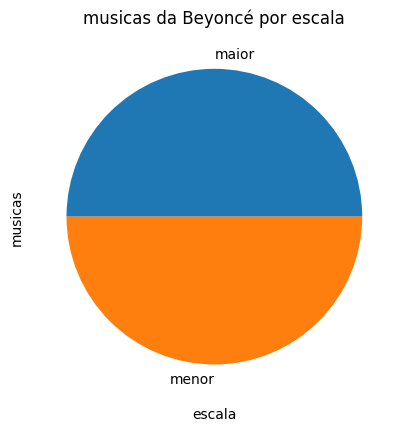

In [54]:
# grafico das musicas da beyonce por escala
beyonce_escala.plot.pie()

plt.xlabel('escala')
plt.ylabel('musicas')
plt.title('musicas da Beyoncé por escala')

In [29]:
# Obter o valor máximo e mínimo de streams das musicas da beyonce
maior_stream = df_beyonce["streams"].max()
menor_stream = df_beyonce["streams"].min()

print(maior_stream)
print(menor_stream)

595900742
171788484


In [42]:
# Agrupar musicas da beyonce por streams
agruparstreams = df_beyonce.groupby('streams')
beyonce_streams = agruparstreams['nome da musica'].count()

print(beyonce_streams)

streams
171788484    1
354614964    1
57089066     1
595900742    1
Name: nome da musica, dtype: int64


Text(0.5, 1.0, 'musicas da beyonce por ano de lancamento')

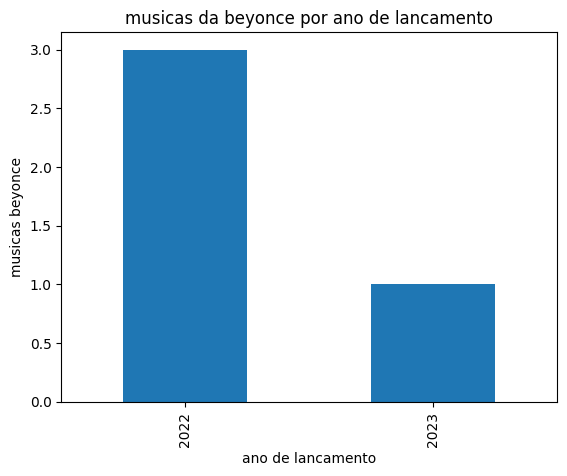

In [68]:
# Agrupar musicas da Beyonce por ano de lancamento
agrupar_beyonce = df_beyonce.groupby("ano de lancamento")
ano_beyonce = agrupar_beyonce["nome da musica"].count()

ano_beyonce.plot.bar()
plt.xlabel('ano de lancamento')
plt.ylabel('musicas beyonce')
plt.title('musicas da beyonce por ano de lancamento')

Text(0.5, 1.0, 'musicas Anitta por ano de lancamento')

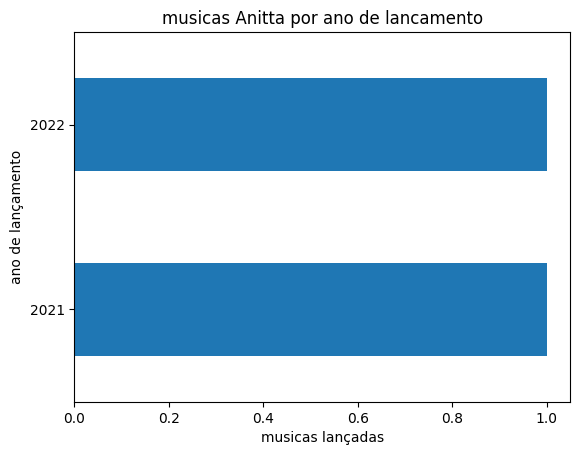

In [60]:
# Agrupar musicas da Anitta por ano de lancamento
agrupar_anitta = df_anitta.groupby("ano de lancamento")
ano_anitta = agrupar_anitta["nome da musica"].count()

ano_anitta.plot.barh()
plt.xlabel('musicas lançadas')
plt.ylabel('ano de lançamento')
plt.title('musicas Anitta por ano de lancamento')

Text(0.5, 1.0, 'musicas por ano de lancamento')

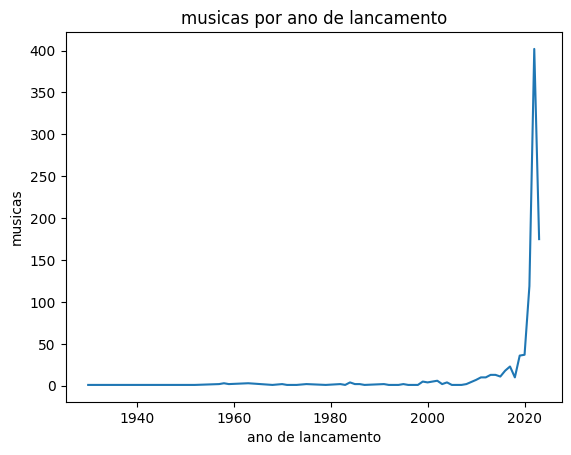

In [33]:
# Agrupar musicas do df principal por ano de lancamento
agrupar_ano = df.groupby("ano de lancamento")
ano = agrupar_ano["nome da musica"].count()

ano.plot.line()
plt.xlabel('ano de lancamento')
plt.ylabel('musicas')
plt.title('musicas por ano de lancamento')

In [69]:
# Vendo detalhadamente quantas músicas por ano foram lançadas
print(ano)

ano de lancamento
1930      1
1942      1
1946      1
1950      1
1952      1
1957      2
1958      3
1959      2
1963      3
1968      1
1970      2
1971      1
1973      1
1975      2
1979      1
1982      2
1983      1
1984      4
1985      2
1986      2
1987      1
1991      2
1992      1
1994      1
1995      2
1996      1
1997      1
1998      1
1999      5
2000      4
2002      6
2003      2
2004      4
2005      1
2007      1
2008      2
2010      7
2011     10
2012     10
2013     13
2014     13
2015     11
2016     18
2017     23
2018     10
2019     36
2020     37
2021    119
2022    402
2023    175
Name: nome da musica, dtype: int64


In [46]:
# Obter o valor máximo e mínimo de streams das musicas da Anitta
maior_stream = df_anitta["streams"].max()
menor_stream = df_anitta["streams"].min()

print(maior_stream)
print(menor_stream)

546191065
121189256


In [72]:
# media de artista por musica
media_musica = df['artistas envolvidos'].mean()
print(media_musica)

1.5561385099685205


# Aprendizados
Consegui traduzir as colunas e substituir alguns valores, o que não tinha conseguido na semana anterior,

Na semana anterior fiz uma análise das músicas pelo mês de lançamento, já que não soube escolher um gráfico que melhor mostrasse por ano. Dessa vez foi possível utilizando um gráfico de linhas,

Há 4 músicas da Beyonce listadas no csv e 3 delas foram lançadas em 2022, enquanto 1 foi lançada em 2023,

Também existem músicas de artistas brasileiros, como a Anitta. Ela possui duas músicas na lista, cada uma lançada em 2021 e 2022,

É interessante observar que algumas das músicas mais escutadas em 2023 foram lançadas há quase uma década: há músicas de 1930 até 2023,

A média de artistas envolvidos em uma música é de 1.55, o que demonstra que a maioria das canções tem apenas um ou dois artistas as interpretando,

Consegui fazer mais análises e gráficos pensando em dados mais específicos, como o dataframe da Beyonce e o da Anitta,

Queria ter conseguido transformar a coluna de streams para float ou int. Não consegui fazer algumas análises (como a média) e gráficos que tinha em mente por isso,

Queria ter feito um gráfico com os valores máximos e mínimos de streams, porém, não soube como colocar as duas variáveis juntas para constituírem o gráfico.